##### Yu Han May, 2023
This script is evolved from 0.replicability. Protein and non protein channel features are seperated. x-axis is technical replicability (1), y-axis is biological replicability (2). 

In [1]:
import pandas as pd
import numpy as np
from copairs.map import aggregate
from copairs.map import run_pipeline
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#read profile
df_p1=pd.read_csv('../../varchamp_profiles/2023_02_23_Batch_3/2022_10_11_PPL9_P1/2022_10_11_PPL9_P1_normalized_feature_select_batch.csv.gz')
df_p2=pd.read_csv('../../varchamp_profiles/2023_02_23_Batch_3/2022_09_29_PPL9_P2/2022_09_29_PPL9_P2_normalized_feature_select_batch.csv.gz')
df_p3=pd.read_csv('../../varchamp_profiles/2023_02_23_Batch_3/2022_09_29_PPL9_P3/2022_09_29_PPL9_P3_normalized_feature_select_batch.csv.gz')
#read metadata
df_metadata=pd.read_csv('../../varchamp_profiles/2023_02_23_Batch_3.csv')
df_metadata.head(2)

,Metadata_Well,384_ID,entryID,Symbol,entry_plate.x,entry_well.x,entry_numb,dest_plate_96,dest_well_96,dest_numb_96,...,r384,c384,Metadata_Plate,batch,control,Gene,MT,Variant,Metadata_Sample_Unique,Metadata_batch_Plate
0,A01,1_1,DisWTGDEh03_F06,ACSF3,DisWTGDEh03,F06,46.0,FVrry_P01_Q01,A01,1.0,...,1.0,1.0,2022_10_11_PPL9_P1,2023_02_23_Batch_3,False,ACSF3,NaN,ACSF3,ACSF3,2023_02_23_Batch_3-2022_10_11_PPL9_P1
1,C01,3_1,VUSmut_GDEh03_A02,ACSF3,VUSmut_GDEh03,A02,9.0,FVrry_P01_Q01,B01,2.0,...,3.0,1.0,2022_10_11_PPL9_P1,2023_02_23_Batch_3,False,ACSF3,Ala197Thr,ACSF3 Ala197Thr,ACSF3 Ala197Thr,2023_02_23_Batch_3-2022_10_11_PPL9_P1


In [3]:
#concatenate df_p1, df_p2, df_p3
df=pd.concat([df_p1,df_p2,df_p3],axis=0)
#remove Metadata_Symbol=516-TC in df
df_profile=df[df['Metadata_Symbol']!='516 - TC']
df_profile.head(2)

,Metadata_384_ID,Metadata_entryID,Metadata_Symbol,Metadata_entry_plate.x,Metadata_entry_well.x,Metadata_entry_numb,Metadata_dest_plate_96,Metadata_dest_well_96,Metadata_dest_numb_96,Metadata_orf_id,...,Nuclei_Texture_SumEntropy_DNA_20_01_256,Nuclei_Texture_SumEntropy_DNA_20_02_256,Nuclei_Texture_SumEntropy_DNA_20_03_256,Nuclei_Texture_SumVariance_AGP_20_02_256,Nuclei_Texture_SumVariance_DNA_20_01_256,Nuclei_Texture_SumVariance_DNA_20_02_256,Nuclei_Texture_SumVariance_DNA_20_03_256,Nuclei_Texture_SumVariance_GFP_5_01_256,Nuclei_Texture_SumVariance_Mito_20_03_256,Nuclei_Texture_Variance_AGP_10_00_256
0,1_1,DisWTGDEh03_F06,ACSF3,DisWTGDEh03,F06,46.0,FVrry_P01_Q01,A01,1.0,71337.0,...,-1.6834,-1.84680,-1.56960,-0.43763,-1.05170,-1.06410,-0.99208,-0.59723,0.94397,-0.54754
1,3_1,VUSmut_GDEh03_A02,ACSF3,VUSmut_GDEh03,A02,9.0,FVrry_P01_Q01,B01,2.0,71337.0,...,0.1716,0.42315,0.38591,-0.64088,0.37808,0.38868,1.27990,-0.65973,4.86160,-0.73677


In [4]:
#merge Gene, MT, and Metadata_Sample_Unique from df_metadata to df_profile 
#based on columns of Metadata_Well and Metadata_Plate
df_merge=df_profile.merge(df_metadata[['Metadata_Well','Metadata_Plate','Gene','MT','Metadata_Sample_Unique']],on=['Metadata_Well','Metadata_Plate'],how='left')
#change Gene to Metadata_Gene and MT to Metadata_MT
df_merge.rename(columns={'Gene':'Metadata_Gene','MT':'Metadata_MT'},inplace=True)
#add a column of Metadata_type where if Metadata_MT is NaN, Metadata_type is 'WT', otherwise 'MT'
df_merge['Metadata_type']=np.where(df_merge['Metadata_MT'].isnull(),'WT','MT')
df_merge.head(2)

,Metadata_384_ID,Metadata_entryID,Metadata_Symbol,Metadata_entry_plate.x,Metadata_entry_well.x,Metadata_entry_numb,Metadata_dest_plate_96,Metadata_dest_well_96,Metadata_dest_numb_96,Metadata_orf_id,...,Nuclei_Texture_SumVariance_DNA_20_01_256,Nuclei_Texture_SumVariance_DNA_20_02_256,Nuclei_Texture_SumVariance_DNA_20_03_256,Nuclei_Texture_SumVariance_GFP_5_01_256,Nuclei_Texture_SumVariance_Mito_20_03_256,Nuclei_Texture_Variance_AGP_10_00_256,Metadata_Gene,Metadata_MT,Metadata_Sample_Unique,Metadata_type
0,1_1,DisWTGDEh03_F06,ACSF3,DisWTGDEh03,F06,46.0,FVrry_P01_Q01,A01,1.0,71337.0,...,-1.05170,-1.06410,-0.99208,-0.59723,0.94397,-0.54754,ACSF3,NaN,ACSF3,WT
1,3_1,VUSmut_GDEh03_A02,ACSF3,VUSmut_GDEh03,A02,9.0,FVrry_P01_Q01,B01,2.0,71337.0,...,0.37808,0.38868,1.27990,-0.65973,4.86160,-0.73677,ACSF3,Ala197Thr,ACSF3 Ala197Thr,MT


In [5]:
#extract meta and feat columns
meta_cols = [c for c in df_merge.columns if c.startswith('Meta')]
feat_cols = [c for c in df_merge.columns if not c.startswith('Meta')]
#select protein channel features, where GFP exists in feat_cols
feat_cols_protein=[c for c in feat_cols if 'GFP' in c]
#select non-protein channel features, where GFP does not exist in feat_cols
feat_cols_non_protein=[c for c in feat_cols if 'GFP' not in c]

In [6]:
meta = df_merge[meta_cols]
feats_protein = df_merge[feat_cols_protein].values
feats_non_protein = df_merge[feat_cols_non_protein].values

## Protein Channel

#### retrieve mutants from its WT, protein channel

In [7]:
pos_sameby = ['Metadata_Gene']
pos_diffby = ['Metadata_type']
neg_sameby = []
neg_diffby = ['Metadata_Gene']
null_size = 10000

In [8]:
bio_result = run_pipeline(meta, feats_protein, pos_sameby, pos_diffby, neg_sameby, neg_diffby, null_size)
#remove Metadata_type=WT
bio_result=bio_result[bio_result['Metadata_type']!='WT']
bio_result_agg=aggregate(bio_result, 'Metadata_Sample_Unique', threshold=0.05)
bio_result_agg[['above_p_threshold', 'above_q_threshold']].value_counts()


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

above_p_threshold  above_q_threshold
False              False                131
True               True                  90
                   False                 33
Name: count, dtype: int64

#### retrieve replicates from non replicates, protein channel

In [9]:
#pos is what you are matching on
#sameby is what condition shall be the same (e.g., same perturbation, same target)
pos_sameby = ['Metadata_Sample_Unique']
#diffby is what condition shall be different (e.g., different plate)
pos_diffby = []

#neg is what you are matching against
#sameby is barely used unless you want to limit the sample, e.g., only against control in the ssame plate
neg_sameby = []
#diffby is what condition shall be different (e.g., control vs. non control)
neg_diffby = ['Metadata_Sample_Unique']
null_size = 10000

In [10]:
tech_result = run_pipeline(meta, feats_protein, pos_sameby, pos_diffby, neg_sameby, neg_diffby, null_size)
#combine scores from samples with the same Metadata_Sample_Unique
tech_result_agg=aggregate(tech_result, 'Metadata_Sample_Unique', threshold=0.05)
tech_result_agg[['above_p_threshold', 'above_q_threshold']].value_counts()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

above_p_threshold  above_q_threshold
True               True                 282
False              False                 58
True               False                  6
Name: count, dtype: int64

In [11]:
#merge bio_result_agg and tech_result_agg based on Metadata_Sample_Unique, include nlog10pvalue
df_merge_result=bio_result_agg.merge(tech_result_agg[['Metadata_Sample_Unique','nlog10pvalue']],on='Metadata_Sample_Unique',how='left')


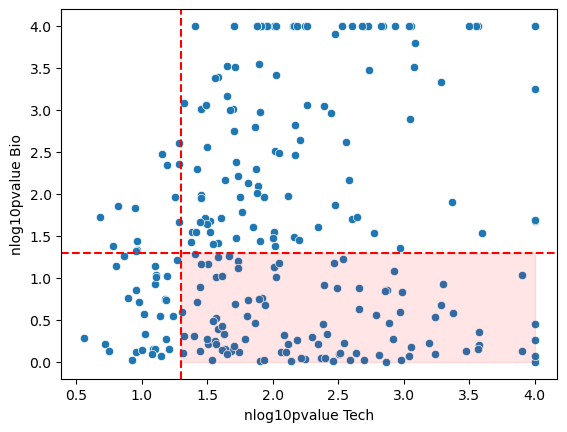

In [12]:
#plot scatter plot using seaborn
#x is nlog10pvalue where Metadata_Type=Tech, y is nlog10pvalue where Metadata_Type=Bio
sns.scatterplot(data=df_merge_result, x='nlog10pvalue_y', y='nlog10pvalue_x')
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')
plt.axvline(x=-np.log10(0.05), color='r', linestyle='--')
#add x axis label
plt.xlabel('nlog10pvalue Tech')
plt.ylabel('nlog10pvalue Bio')
#color the lower right side of the plot
plt.fill_between([ -np.log10(0.05),4], [0, 0], -np.log10(0.05), color='red', alpha=0.1)
plt.show()

## Non Protein Channel 

#### retrieve mutants from its WT, non protein channel

In [13]:
pos_sameby = ['Metadata_Gene']
pos_diffby = ['Metadata_type']
neg_sameby = []
neg_diffby = ['Metadata_Gene']
null_size = 10000

In [14]:
bio_result = run_pipeline(meta, feats_non_protein, pos_sameby, pos_diffby, neg_sameby, neg_diffby, null_size)
#remove Metadata_type=WT
bio_result=bio_result[bio_result['Metadata_type']!='WT']
bio_result_agg=aggregate(bio_result, 'Metadata_Sample_Unique', threshold=0.05)
bio_result_agg[['above_p_threshold', 'above_q_threshold']].value_counts()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

above_p_threshold  above_q_threshold
False              False                188
True               True                  35
                   False                 31
Name: count, dtype: int64

#### retrieve replicates from non replicates, non protein channel

In [15]:
#pos is what you are matching on
#sameby is what condition shall be the same (e.g., same perturbation, same target)
pos_sameby = ['Metadata_Sample_Unique']
#diffby is what condition shall be different (e.g., different plate)
pos_diffby = []

#neg is what you are matching against
#sameby is barely used unless you want to limit the sample, e.g., only against control in the ssame plate
neg_sameby = []
#diffby is what condition shall be different (e.g., control vs. non control)
neg_diffby = ['Metadata_Sample_Unique']
null_size = 10000

In [16]:
tech_result = run_pipeline(meta, feats_non_protein, pos_sameby, pos_diffby, neg_sameby, neg_diffby, null_size)
#combine scores from samples with the same Metadata_Sample_Unique
tech_result_agg=aggregate(tech_result, 'Metadata_Sample_Unique', threshold=0.05)
tech_result_agg[['above_p_threshold', 'above_q_threshold']].value_counts()

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

above_p_threshold  above_q_threshold
False              False                206
True               False                 93
                   True                  47
Name: count, dtype: int64

In [17]:
#merge bio_result_agg and tech_result_agg based on Metadata_Sample_Unique, include nlog10pvalue
df_merge_result=bio_result_agg.merge(tech_result_agg[['Metadata_Sample_Unique','nlog10pvalue']],on='Metadata_Sample_Unique',how='left')

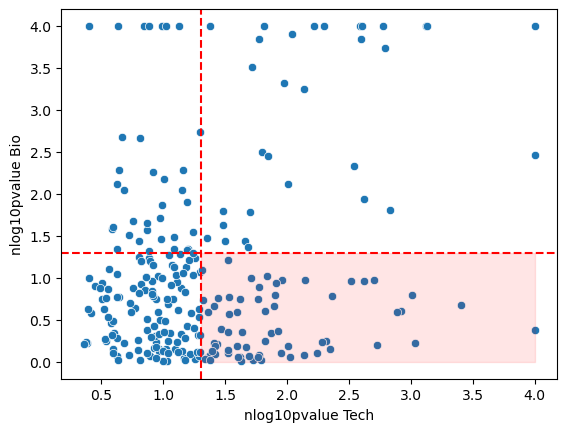

In [18]:
#plot scatter plot using seaborn
#x is nlog10pvalue where Metadata_Type=Tech, y is nlog10pvalue where Metadata_Type=Bio
sns.scatterplot(data=df_merge_result, x='nlog10pvalue_y', y='nlog10pvalue_x')
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--')
plt.axvline(x=-np.log10(0.05), color='r', linestyle='--')
plt.xlabel('nlog10pvalue Tech')
plt.ylabel('nlog10pvalue Bio')
#color the lower right side of the plot
plt.fill_between([ -np.log10(0.05),4], [0, 0], -np.log10(0.05), color='red', alpha=0.1)
plt.show()